In [1]:
# Standard stuff
import numpy as np                              #For almost everything
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9']
cmap = ListedColormap([np.array([0, 114.0/256, 178.0/256, 1]),
                       np.array([0, 158.0/256, 115.0/256, 1]),
                       np.array([213.0/256, 94.0/256, 0, 1]),
                       np.array([204.0/256, 121.0/256, 167.0/256, 1]),
                       np.array([86.0/256, 180.0/256, 233.0/256, 1])])

In [2]:
FS24 = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190410_South_EOM_Driver/South_EOM_Driver_pm24Vsup_60dBAttn_FreqSweep_-10dBmSourcePow_10-04-2019_154733.txt')
FS21 = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190410_South_EOM_Driver/South_EOM_Driver_pm21Vsup_60dBAttn_FreqSweep_-10dBmSourcePow_10-04-2019_154001.txt')
FS18 = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190410_South_EOM_Driver/South_EOM_Driver_pm18Vsup_60dBAttn_FreqSweep_-10dBmSourcePow_10-04-2019_153647.txt')
PS24 = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190410_South_EOM_Driver/South_EOM_Driver_pm24Vsup_60dBAttn_PowerSweep_WR_10-04-2019_162657.txt')
PS21 = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190410_South_EOM_Driver/South_EOM_Driver_pm21Vsup_60dBAttn_PowerSweep_WR_10-04-2019_162950.txt')
PS18 = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190410_South_EOM_Driver/South_EOM_Driver_pm18Vsup_60dBAttn_PowerSweep_WR_10-04-2019_163153.txt')

No handlers could be found for logger "matplotlib.legend"


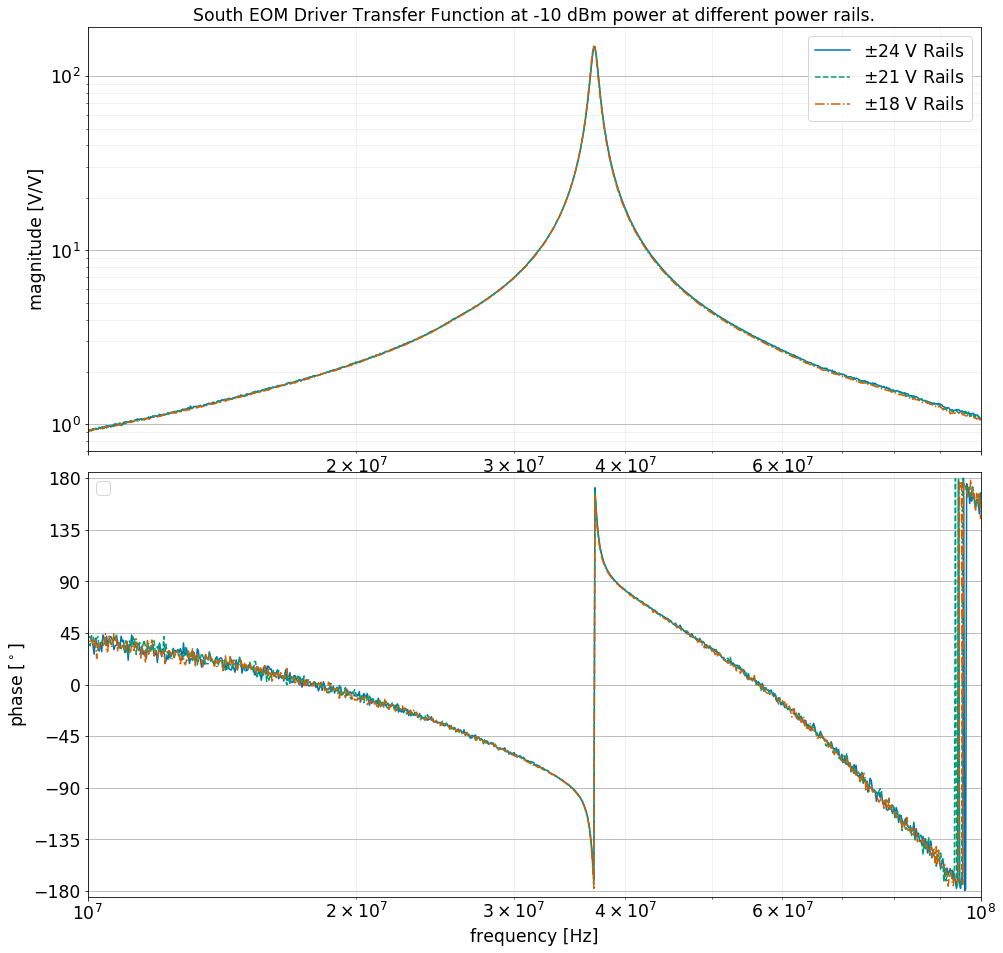

In [3]:
ff = FS24[:,0]
mag24 = (10**(FS24[:,1]/20.0))*1e3  #Attenuation by a factor of 1000 was applied.
ph24 = FS24[:,2]
mag21 = (10**(FS21[:,1]/20.0))*1e3
ph21 = FS21[:,2]
mag18 = (10**(FS18[:,1]/20.0))*1e3
ph18 = FS18[:,2]
fig = plt.figure(figsize=[16,16])
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0.05)
mag_ax = fig.add_subplot(gs[0])
phase_ax = fig.add_subplot(gs[1], sharex=mag_ax)

mag_ax.loglog(ff,mag24, color = cList[0], linestyle = '-',label=r'$\pm24$ V Rails')
mag_ax.loglog(ff,mag21, color = cList[1], linestyle = '--',label=r'$\pm21$ V Rails')
mag_ax.loglog(ff,mag18, color = cList[2], linestyle = '-.',label=r'$\pm18$ V Rails')
mag_ax.set_ylabel('magnitude [V/V]')
mag_ax.set_xlim(min(ff), max(ff))
mag_ax.legend()

phase_ax.set_ylim(-185, 185)
ticks = np.arange(-180, 181, 45)
phase_ax.yaxis.set_ticks(ticks)
phase_ax.semilogx(ff, ph24, color = cList[0], linestyle = '-')
phase_ax.semilogx(ff, ph21, color = cList[1], linestyle = '--')
phase_ax.semilogx(ff, ph18, color = cList[2], linestyle = '-.')
phase_ax.set_ylabel(r'phase [$^\circ$]')
phase_ax.set_xlabel('frequency [Hz]')
phase_ax.legend()

plt.setp(mag_ax.get_xticklabels(), visible=False)
mag_ax.grid('on', which='both')
mag_ax.grid(alpha=0.2, which='minor')
phase_ax.grid('on', which='both')
phase_ax.grid(alpha=0.2, which='minor')

mag_ax.set_title('South EOM Driver Transfer Function at -10 dBm power at different power rails.')

figlist +=[fig]

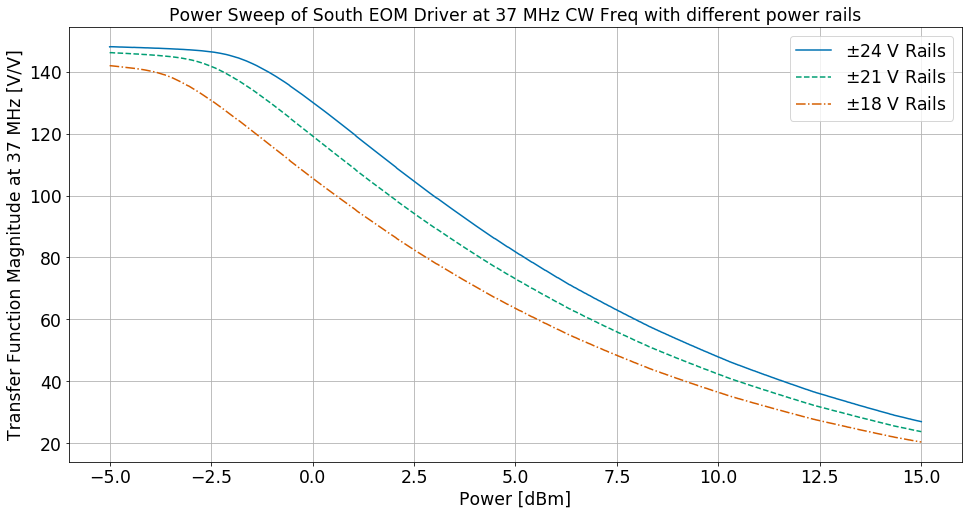

In [4]:
pp = PS24[:,0]
psmag24 = (10**(PS24[:,1]/20.0))*1e3  #Attenuation by a factor of 1000 was applied.
psmag21 = (10**(PS21[:,1]/20.0))*1e3  #Attenuation by a factor of 1000 was applied.
psmag18 = (10**(PS18[:,1]/20.0))*1e3  #Attenuation by a factor of 1000 was applied.

fig2 = plt.figure(figsize=[16,8])
fig2.gca().plot(pp,psmag24, color = cList[0], linestyle = '-',label=r'$\pm24$ V Rails')
fig2.gca().plot(pp,psmag21, color = cList[1], linestyle = '--',label=r'$\pm21$ V Rails')
fig2.gca().plot(pp,psmag18, color = cList[2], linestyle = '-.',label=r'$\pm18$ V Rails')

fig2.gca().set_title('Power Sweep of South EOM Driver at 37 MHz CW Freq with different power rails')
fig2.gca().set_xlabel('Power [dBm]')
fig2.gca().set_ylabel('Transfer Function Magnitude at 37 MHz [V/V]')

fig2.gca().grid('on', which='both')
fig2.gca().grid(alpha=0.2, which='minor')
fig2.gca().legend()
figlist +=[fig2]

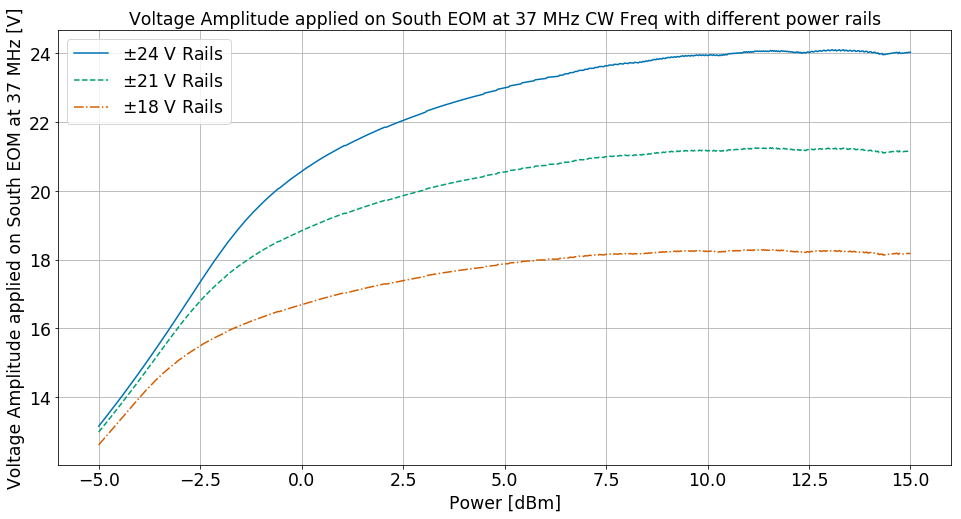

In [5]:
pp = PS24[:,0]
ppV = (10**((pp-10)/20))/2
psVout24 = psmag24*ppV
psVout21 = psmag21*ppV
psVout18 = psmag18*ppV

fig3 = plt.figure(figsize=[16,8])
fig3.gca().plot(pp,psVout24, color = cList[0], linestyle = '-',label=r'$\pm24$ V Rails')
fig3.gca().plot(pp,psVout21, color = cList[1], linestyle = '--',label=r'$\pm21$ V Rails')
fig3.gca().plot(pp,psVout18, color = cList[2], linestyle = '-.',label=r'$\pm18$ V Rails')

fig3.gca().set_title('Voltage Amplitude applied on South EOM at 37 MHz CW Freq with different power rails')
fig3.gca().set_xlabel('Power [dBm]')
fig3.gca().set_ylabel('Voltage Amplitude applied on South EOM at 37 MHz [V]')

fig3.gca().grid('on', which='both')
fig3.gca().grid(alpha=0.2, which='minor')
fig3.gca().legend()
figlist +=[fig3]

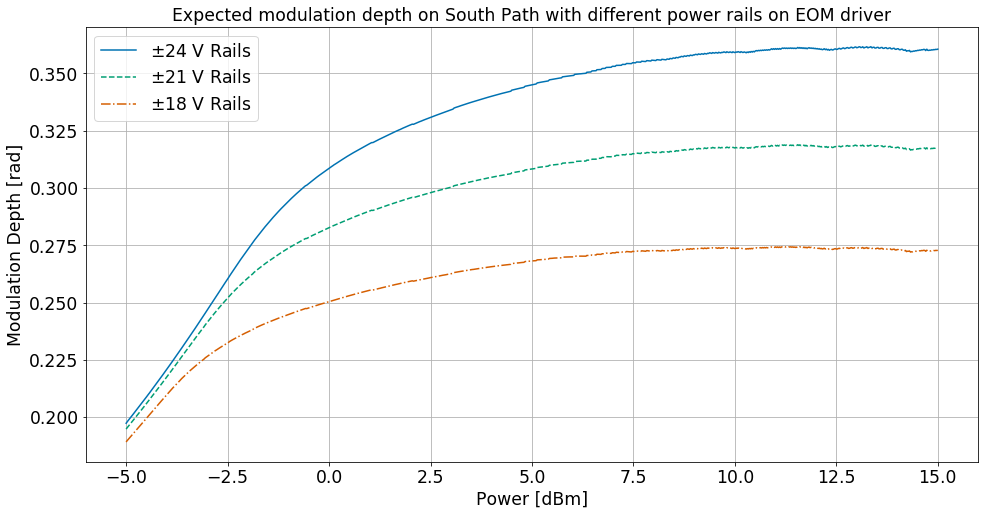

In [6]:
pp = PS24[:,0]
modSlope = 15e-3   #15 mrad/V modulation slope of broadband EOM New Focus 4004 (https://www.newport.com/medias/sys_master/images/images/h65/hcc/8797007839262/400X-and-406X-User-Manual-Rev-J.pdf)
psbeta24 = psVout24*modSlope
psbeta21 = psVout21*modSlope
psbeta18 = psVout18*modSlope

fig4 = plt.figure(figsize=[16,8])
fig4.gca().plot(pp,psbeta24, color = cList[0], linestyle = '-',label=r'$\pm24$ V Rails')
fig4.gca().plot(pp,psbeta21, color = cList[1], linestyle = '--',label=r'$\pm21$ V Rails')
fig4.gca().plot(pp,psbeta18, color = cList[2], linestyle = '-.',label=r'$\pm18$ V Rails')

fig4.gca().set_title('Expected modulation depth on South Path with different power rails on EOM driver')
fig4.gca().set_xlabel('Power [dBm]')
fig4.gca().set_ylabel('Modulation Depth [rad]')

fig4.gca().grid('on', which='both')
fig4.gca().grid(alpha=0.2, which='minor')
fig4.gca().legend()
figlist +=[fig4]

In [7]:
pp = PdfPages('South_EOM_TF_Analysis.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()

In [8]:
pp=PS18[:,0]
pp[np.argmin(np.abs(psbeta24-0.3))]

-0.65

In [9]:
print('Expected modulation depth at -0.33 dBm input power = '+str(np.round(psbeta24[np.argmin(np.abs(pp-0.33))],2)))

Expected modulation depth at -0.33 dBm input power = 0.31
